In [2]:
%matplotlib notebook
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from escape.parse import swissfel
import h5py
from jungfrau_utils import apply_gain_pede, apply_geometry
h5py.enable_ipython_completer()
import time
import sys

In [3]:
sys.path.insert(0, '../src/')
from data_analysis import *
from integrators import *

In [4]:
n_shots = 2000
run = '0017_droplets_10um_2mm'#'0011_jet10um_RT'
path = '/sf/bernina/data/p17743/res/scan_info/'
# load data                                                                         
file_path = '%srun%s.json'%(path,run)
print('-- Loading data:%s'%file_path)
data = swissfel.parseScanEco_v01(file_path,createEscArrays=True,memlimit_mD_MB=50)

-- Loading data:/sf/bernina/data/p17743/res/scan_info/run0017_droplets_10um_2mm.json
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH4:2 in cycle 0
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH5:2 in cycle 0
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH6:2 in cycle 0
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH7:2 in cycle 0
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH7:2 in cycle 1
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH6:2 in cycle 1
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH4:2 in cycle 1
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH5:2 in cycle 1
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH7:2 in cycle 2
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH6:2 in cycle 2
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH4:2 in cycle 2
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH5:2 in cycle 2
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH7:2 in cycle 3
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH6:2 in cycle 3
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH

In [5]:
data

{'JF03T01V01': <escape.storage.Array object at 0x2b4765efe7b8> None; shape (11000, 512, 1024)
 Scan over 11 steps
 Parameters lxt, lxt_readback,
 'JF07T32V01': <escape.storage.Array object at 0x2b4765eedb38> None; shape (11000, 16384, 1024)
 Scan over 11 steps
 Parameters lxt, lxt_readback,
 'S10MA01-DCDR080:AL1-B1': <escape.storage.Array object at 0x2b4765eedcf8> None; shape (43967, 1)
 Scan over 11 steps
 Parameters lxt, lxt_readback,
 'SAR-CVME-TIFALL5:EvtSet': <escape.storage.Array object at 0x2b4765efe4e0> None; shape (43967, 256)
 Scan over 11 steps
 Parameters lxt, lxt_readback,
 'SARBD01-DBPM040:T1': <escape.storage.Array object at 0x2b4765eed908> None; shape (11000, 1)
 Scan over 11 steps
 Parameters lxt, lxt_readback,
 'SARBD02-DBPM010:T1': <escape.storage.Array object at 0x2b4765eedba8> None; shape (11000, 1)
 Scan over 11 steps
 Parameters lxt, lxt_readback,
 'SARBD02-DBPM040:T1': <escape.storage.Array object at 0x2b4765eeddd8> None; shape (11000, 1)
 Scan over 11 steps
 Pa

In [6]:
jf3 = data['JF03T01V01'] # JungFrau3 data                                            
total_shots = jf3.data.shape[jf3.eventDim]
print(total_shots)
#if (n_shots>total_shots) or (n_shots==0):
#    n_shots = total_shots
#print('-- JungFrau 16 Mpix detector contains %d shots - analyzing %d shots' % (total_shots, n_shots))

11000


In [7]:
with h5py.File('/sf/bernina/config/jungfrau/gainMaps/JF03T01V01/gains.h5','r') as f:
    gains = f['gains'].value
with h5py.File('/sf/bernina/data/p17743/res/JF_pedestal/pedestal_20190115_1551.JF03T01V01.res.h5','r') as f:
    pede = f['gains'].value
    noise = f['gainsRMS'].value
    mask = f['pixel_mask'].value

In [8]:
nshots =100
i_shot = 0
icorr = apply_gain_pede(jf3.data[i_shot].compute(),G=gains, P=pede, pixel_mask=mask)
icorr_geom = apply_geometry(icorr,'JF03T01V01')
avg_img = icorr_geom
for i_shot in range(nshots):
    t1 = time.time()
    icorr = apply_gain_pede(jf3.data[i_shot].compute(),G=gains, P=pede, pixel_mask=mask)
    icorr_geom = apply_geometry(icorr,'JF03T01V01')
    avg_img+= icorr_geom
    print('s.%i, %.1f Hz' % (i_shot+1, 1.0/(time.time() - t1) ))
avg_img/=nshots

s.1, 104.3 Hz
s.2, 123.4 Hz
s.3, 169.1 Hz
s.4, 154.0 Hz
s.5, 170.9 Hz
s.6, 160.8 Hz
s.7, 155.9 Hz
s.8, 31.7 Hz
s.9, 33.3 Hz
s.10, 161.3 Hz
s.11, 173.9 Hz
s.12, 159.8 Hz
s.13, 188.0 Hz
s.14, 153.0 Hz
s.15, 182.6 Hz
s.16, 91.9 Hz
s.17, 201.3 Hz
s.18, 146.0 Hz
s.19, 168.1 Hz
s.20, 165.1 Hz
s.21, 182.8 Hz
s.22, 203.3 Hz
s.23, 212.6 Hz
s.24, 192.9 Hz
s.25, 180.2 Hz
s.26, 173.9 Hz
s.27, 166.3 Hz
s.28, 176.1 Hz
s.29, 191.9 Hz
s.30, 210.1 Hz
s.31, 200.7 Hz
s.32, 195.7 Hz
s.33, 196.0 Hz
s.34, 190.6 Hz
s.35, 228.8 Hz
s.36, 182.5 Hz
s.37, 195.8 Hz
s.38, 203.1 Hz
s.39, 187.4 Hz
s.40, 206.5 Hz
s.41, 208.6 Hz
s.42, 202.1 Hz
s.43, 98.0 Hz
s.44, 94.9 Hz
s.45, 202.3 Hz
s.46, 216.1 Hz
s.47, 219.8 Hz
s.48, 202.3 Hz
s.49, 196.2 Hz
s.50, 204.4 Hz
s.51, 21.8 Hz
s.52, 26.0 Hz
s.53, 28.8 Hz
s.54, 30.4 Hz
s.55, 32.5 Hz
s.56, 32.1 Hz
s.57, 31.2 Hz
s.58, 31.5 Hz
s.59, 30.4 Hz
s.60, 31.7 Hz
s.61, 33.0 Hz
s.62, 31.5 Hz
s.63, 31.5 Hz
s.64, 30.1 Hz
s.65, 30.1 Hz
s.66, 24.0 Hz
s.67, 29.1 Hz
s.68, 26.0 Hz
s.69, 28.2 H

## plotting the JF3

<IPython.core.display.Javascript object>


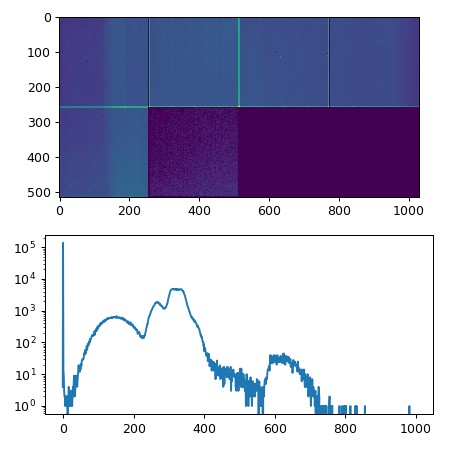

In [20]:
plt.figure(figsize=[5,5])
plt.subplot(2,1,1)
plt.imshow(avg_img,clim=[1e2,1e3])

plt.subplot(2,1,2)
bi,bf,db = 0,1000,1
bins = np.arange(bi-db,bf+db,db)
hy,hx = np.histogram(avg_img,bins=bins)
plt.plot(hx[1:]-1,hy)
plt.yscale('log',nonposy='clip')
plt.tight_layout()
plt.show()

## selecting thresholds

<IPython.core.display.Javascript object>


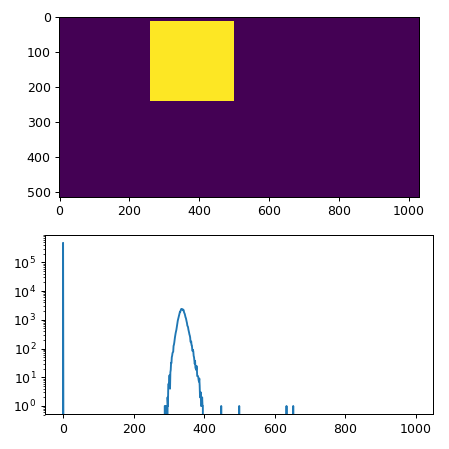

In [25]:
X1,X2 = 10,240#,500
Y1,Y2 = 260,500

mask_i0 = np.zeros(avg_img.shape)
mask_i0[X1:X2,Y1:Y2] = 1 

plt.figure(figsize=[5,5])
plt.subplot(2,1,1)
plt.imshow(avg_img*mask_i0,clim=[20,40])

plt.subplot(2,1,2)
bi,bf,db = 0,1e3,1
bins = np.arange(bi-db,bf+db,db)
hy,hx = np.histogram(avg_img*mask_i0,bins=bins)
plt.plot(hx[1:]-1,hy)
plt.yscale('log',nonposy='clip')
plt.tight_layout()
plt.show()

## calculating i0 for each shot

In [108]:
i0 = np.zeros(total_shots)
for i_shot in range(total_shots):
    t1 = time.time()
    icorr = apply_gain_pede(jf3.data[i_shot].compute(),G=gains, P=pede, pixel_mask=mask)
    icorr_geom = apply_geometry(icorr,'JF03T01V01')
    i0[i_shot] = np.average(icorr_geom[X1:X2,Y1:Y2])
    print('s.%i, %.1f Hz' % (i_shot+1, 1.0/(time.time() - t1) ))
print(i0)

s.1, 17.9 Hz
s.2, 18.6 Hz
s.3, 18.7 Hz
s.4, 18.6 Hz
s.5, 17.9 Hz
s.6, 16.3 Hz
s.7, 18.8 Hz
s.8, 18.0 Hz
s.9, 17.2 Hz
s.10, 18.3 Hz
s.11, 18.6 Hz
s.12, 18.6 Hz
s.13, 17.8 Hz
s.14, 17.3 Hz
s.15, 18.0 Hz
s.16, 17.4 Hz
s.17, 18.5 Hz
s.18, 18.6 Hz
s.19, 18.5 Hz
s.20, 18.5 Hz
s.21, 18.5 Hz
s.22, 18.2 Hz
s.23, 18.0 Hz
s.24, 17.3 Hz
s.25, 18.7 Hz
s.26, 18.0 Hz
s.27, 17.3 Hz
s.28, 18.6 Hz
s.29, 18.6 Hz
s.30, 18.3 Hz
s.31, 17.7 Hz
s.32, 17.6 Hz
s.33, 18.0 Hz
s.34, 17.3 Hz
s.35, 18.7 Hz
s.36, 18.4 Hz
s.37, 18.5 Hz
s.38, 18.6 Hz
s.39, 18.9 Hz
s.40, 18.4 Hz
s.41, 18.0 Hz
s.42, 17.4 Hz
s.43, 18.7 Hz
s.44, 18.1 Hz
s.45, 17.4 Hz
s.46, 18.4 Hz
s.47, 18.7 Hz
s.48, 18.2 Hz
s.49, 17.9 Hz
s.50, 17.6 Hz
s.51, 18.0 Hz
s.52, 17.4 Hz
s.53, 18.7 Hz
s.54, 18.8 Hz
s.55, 18.4 Hz
s.56, 18.6 Hz
s.57, 18.7 Hz
s.58, 18.3 Hz
s.59, 17.9 Hz
s.60, 17.6 Hz
s.61, 18.7 Hz
s.62, 17.9 Hz
s.63, 17.3 Hz
s.64, 18.4 Hz
s.65, 18.6 Hz
s.66, 18.3 Hz
s.67, 17.7 Hz
s.68, 17.5 Hz
s.69, 18.0 Hz
s.70, 17.2 Hz
s.71, 18.7 Hz
s.72, 18.4 Hz
s

s.558, 17.5 Hz
s.559, 17.2 Hz
s.560, 18.4 Hz
s.561, 18.7 Hz
s.562, 18.0 Hz
s.563, 17.9 Hz
s.564, 17.6 Hz
s.565, 18.5 Hz
s.566, 17.7 Hz
s.567, 17.3 Hz
s.568, 18.3 Hz
s.569, 18.5 Hz
s.570, 17.5 Hz
s.571, 17.6 Hz
s.572, 17.5 Hz
s.573, 18.0 Hz
s.574, 17.3 Hz
s.575, 18.5 Hz
s.576, 17.6 Hz
s.577, 17.2 Hz
s.578, 18.2 Hz
s.579, 18.6 Hz
s.580, 18.1 Hz
s.581, 17.9 Hz
s.582, 17.4 Hz
s.583, 18.6 Hz
s.584, 17.8 Hz
s.585, 17.2 Hz
s.586, 18.3 Hz
s.587, 18.4 Hz
s.588, 17.5 Hz
s.589, 17.7 Hz
s.590, 17.5 Hz
s.591, 17.9 Hz
s.592, 17.2 Hz
s.593, 18.5 Hz
s.594, 17.5 Hz
s.595, 17.3 Hz
s.596, 18.4 Hz
s.597, 18.6 Hz
s.598, 17.8 Hz
s.599, 17.9 Hz
s.600, 17.5 Hz
s.601, 17.7 Hz
s.602, 17.9 Hz
s.603, 17.4 Hz
s.604, 18.3 Hz
s.605, 18.5 Hz
s.606, 17.6 Hz
s.607, 17.7 Hz
s.608, 17.5 Hz
s.609, 17.9 Hz
s.610, 17.0 Hz
s.611, 18.3 Hz
s.612, 17.2 Hz
s.613, 17.3 Hz
s.614, 18.0 Hz
s.615, 18.6 Hz
s.616, 18.0 Hz
s.617, 17.9 Hz
s.618, 17.1 Hz
s.619, 18.5 Hz
s.620, 17.8 Hz
s.621, 17.3 Hz
s.622, 18.3 Hz
s.623, 18.2 Hz
s.624, 17.

s.1098, 17.3 Hz
s.1099, 17.4 Hz
s.1100, 18.5 Hz
s.1101, 18.7 Hz
s.1102, 18.4 Hz
s.1103, 17.8 Hz
s.1104, 17.8 Hz
s.1105, 17.6 Hz
s.1106, 17.7 Hz
s.1107, 17.3 Hz
s.1108, 18.2 Hz
s.1109, 18.4 Hz
s.1110, 17.4 Hz
s.1111, 17.4 Hz
s.1112, 17.5 Hz
s.1113, 17.9 Hz
s.1114, 17.2 Hz
s.1115, 18.5 Hz
s.1116, 17.3 Hz
s.1117, 17.4 Hz
s.1118, 18.1 Hz
s.1119, 18.5 Hz
s.1120, 18.0 Hz
s.1121, 18.0 Hz
s.1122, 17.8 Hz
s.1123, 17.5 Hz
s.1124, 17.8 Hz
s.1125, 17.3 Hz
s.1126, 18.2 Hz
s.1127, 18.3 Hz
s.1128, 17.2 Hz
s.1129, 17.5 Hz
s.1130, 17.2 Hz
s.1131, 17.9 Hz
s.1132, 17.2 Hz
s.1133, 18.5 Hz
s.1134, 17.3 Hz
s.1135, 17.2 Hz
s.1136, 18.1 Hz
s.1137, 18.5 Hz
s.1138, 18.0 Hz
s.1139, 17.8 Hz
s.1140, 17.9 Hz
s.1141, 17.5 Hz
s.1142, 17.9 Hz
s.1143, 17.2 Hz
s.1144, 18.3 Hz
s.1145, 18.6 Hz
s.1146, 17.4 Hz
s.1147, 17.3 Hz
s.1148, 17.6 Hz
s.1149, 18.0 Hz
s.1150, 17.3 Hz
s.1151, 18.5 Hz
s.1152, 17.2 Hz
s.1153, 15.5 Hz
s.1154, 17.0 Hz
s.1155, 18.6 Hz
s.1156, 18.3 Hz
s.1157, 17.9 Hz
s.1158, 17.5 Hz
s.1159, 17.5 Hz
s.1160, 

s.1612, 18.5 Hz
s.1613, 18.2 Hz
s.1614, 17.5 Hz
s.1615, 17.6 Hz
s.1616, 17.6 Hz
s.1617, 17.8 Hz
s.1618, 17.3 Hz
s.1619, 18.6 Hz
s.1620, 18.0 Hz
s.1621, 18.4 Hz
s.1622, 18.3 Hz
s.1623, 18.8 Hz
s.1624, 18.4 Hz
s.1625, 17.8 Hz
s.1626, 17.6 Hz
s.1627, 17.5 Hz
s.1628, 17.7 Hz
s.1629, 17.1 Hz
s.1630, 18.2 Hz
s.1631, 18.6 Hz
s.1632, 17.5 Hz
s.1633, 17.6 Hz
s.1634, 17.5 Hz
s.1635, 17.9 Hz
s.1636, 17.2 Hz
s.1637, 18.8 Hz
s.1638, 18.3 Hz
s.1639, 18.5 Hz
s.1640, 18.3 Hz
s.1641, 18.8 Hz
s.1642, 18.2 Hz
s.1643, 17.7 Hz
s.1644, 17.7 Hz
s.1645, 17.6 Hz
s.1646, 17.8 Hz
s.1647, 17.3 Hz
s.1648, 18.4 Hz
s.1649, 18.4 Hz
s.1650, 17.5 Hz
s.1651, 17.7 Hz
s.1652, 17.3 Hz
s.1653, 17.5 Hz
s.1654, 17.0 Hz
s.1655, 18.1 Hz
s.1656, 15.8 Hz
s.1657, 16.8 Hz
s.1658, 18.2 Hz
s.1659, 18.4 Hz
s.1660, 17.8 Hz
s.1661, 17.7 Hz
s.1662, 17.7 Hz
s.1663, 17.3 Hz
s.1664, 17.7 Hz
s.1665, 17.1 Hz
s.1666, 18.2 Hz
s.1667, 18.3 Hz
s.1668, 17.5 Hz
s.1669, 17.8 Hz
s.1670, 17.4 Hz
s.1671, 17.7 Hz
s.1672, 17.2 Hz
s.1673, 17.9 Hz
s.1674, 

<IPython.core.display.Javascript object>


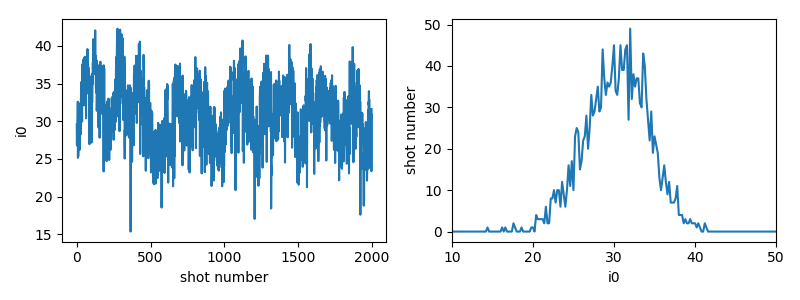

In [128]:
plt.figure(figsize=[8,3])
plt.subplot(1,2,1)
plt.plot(i0)
plt.xlabel('shot number')
plt.ylabel('i0')


plt.subplot(1,2,2)
bi,bf,db = 0,100,0.2
bins = np.arange(bi-db,bf+db,db)
hy,hx = np.histogram(i0,bins=bins)
plt.plot(hx[1:]-1,hy)
plt.tight_layout()
plt.ylabel('shot number')
plt.xlabel('i0')
plt.xlim(10,50)
plt.tight_layout()

plt.show()